In [1]:
from pathlib import Path
import pandas as pd
path = Path(r'/home/diogo/Jupyter/tdef/inmet_portoalegre.txt')
df = pd.read_table(path, skiprows=47, skipfooter=1, engine='python', sep=';', index_col=False, parse_dates=[[1,2]], dayfirst=True) \
       .rename(columns={'VelocidadeVentoNebulosidade':'VelocidadeVento', 'Unnamed: 9':'Nebulosidade'}) \
       .set_index('Data_Hora').shift(freq=pd.DateOffset(hours=-3))
display(df.tail())
df.dtypes

/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


,Estacao,TempBulboSeco,TempBulboUmido,UmidadeRelativa,PressaoAtmEstacao,DirecaoVento,VelocidadeVento,Nebulosidade
Data_Hora,,,,,,,,
2019-02-28 09:00:00,83967,21.0,NaN,82.0,1009.4,0.0,0.00000,4.00
2019-02-28 15:00:00,83967,28.2,NaN,51.0,1010.0,27.0,3.00000,3.00
2019-02-28 21:00:00,83967,22.4,NaN,68.0,1009.2,14.0,1.00000,0.00
2019-03-01 09:00:00,83967,22.7,NaN,75.0,1010.4,0.0,0.00000,1.25
2019-03-01 15:00:00,83967,31.3,NaN,43.0,1006.7,32.0,1.02888,3.75


Estacao                int64
TempBulboSeco        float64
TempBulboUmido       float64
UmidadeRelativa      float64
PressaoAtmEstacao    float64
DirecaoVento         float64
VelocidadeVento      float64
Nebulosidade         float64
dtype: object

.-------------------------------.
| Centralized Moments           |#
| ----------------              |#
|                               |#
| By.: Prof. Carlo R. da Cunha  |#
|                               |#
|                     Apr/2019  |#
'-------------------------------'#
  ################################

Importing Libraries:
Simulating...



/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in double_scalars


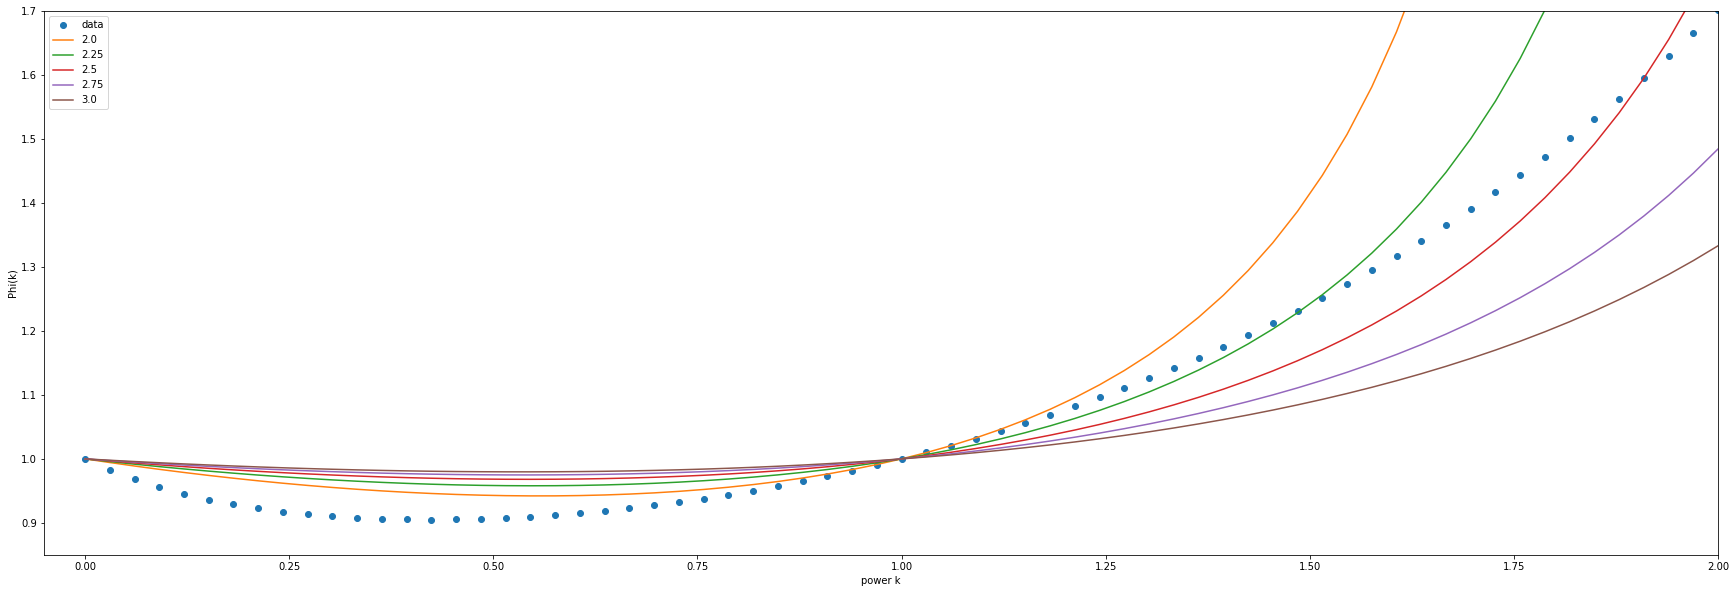

In [6]:
%matplotlib inline
__author__ = """Prof. Carlo R. da Cunha, Ph.D. <creq@if.ufrgs.br>"""

import os

os.system('clear')
print( '.-------------------------------.')
print( '| Centralized Moments           |#')
print( '| ----------------              |#')
print( '|                               |#')
print( '| By.: Prof. Carlo R. da Cunha  |#')
print( '|                               |#')
print( '|                     Apr/2019  |#')
print( '\'-------------------------------\'#')
print( '  ################################')
print( '')
print( 'Importing Libraries:')

import matplotlib.pyplot as pl
import pandas as pd
import numpy as np


print( 'Simulating...')
print( '')

#---------------------------------#
# Normalized Central Moment (NCM) #
#---------------------------------#
def mom(inp):
    k_space = np.linspace(0,3,100)
    
    mu = np.average(inp)    
    
    phi = []
    for k in k_space:
        nu = np.average([abs(r-mu)**k for r in inp])
        de = np.average([abs(r-mu) for r in inp])**k
        phi.append(nu/de)
        
    return k_space, phi

#---------------------------------------------#
# Theoretical NCM for the Pareto distribution #
#---------------------------------------------#
def moa(a):
    k_space = np.linspace(0,3,100)
    
    phi = []
    for k in k_space:
        phi.append(((a-1)**k)/((a**(k-1))*(a-k)))
        
    return k_space, phi

#*********************************************************#
#                          MAIN                           #
#*********************************************************#

# Read File
#df = pd.read_csv('wind3.txt',delimiter=',')
#v = df['velocidade_vento'].values
v = df.VelocidadeVento.values[-2000:]
# Experimental data
x,y = mom(v)
pl.plot(x,y,'o')

# Theoretical data
n_space = np.linspace(2,3,5) 
for n in n_space:
    x,y = moa(n)
    pl.plot(x,y)
    
# Cosmetics
pl.axis([-0.05,2,0.85,1.7])
pl.legend(np.append('data',n_space))
pl.xlabel('power k')
pl.ylabel('Phi(k)')
pl.gcf().set_size_inches(30, 10, forward=True)
pl.show()

.-------------------------------.
| RQA                           |#
| ---                           |#
|                               |#
| By.: Prof. Carlo R. da Cunha  |#
|                               |#
|                     Apr/2019  |#
'-------------------------------'#
  ################################

Importing Libraries:
Simulating...

Taxa de recorrencia..:  77.6712 %
Divergencia..........:  0.0125
Determinismo.........:  1998.9208047131656 %
Preditibilidade time.:  6.194471554291674
Entropia de Shannon..:  nan


/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:160: RuntimeWarning: divide by zero encountered in log
/home/diogo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:160: RuntimeWarning: invalid value encountered in double_scalars


Laminaridade.........:  95.8053604601817 %
Trapping time........:  9.325754730791996



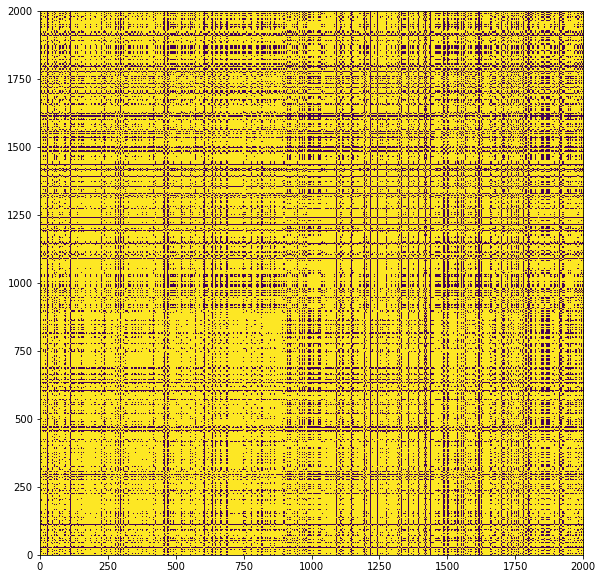

In [8]:
# -*- coding: utf-8 -*-
#!/usr/bin/env python2.7

__author__ = """Prof. Carlo R. da Cunha, Ph.D. <creq@if.ufrgs.br>"""

import os

os.system('clear')
print('.-------------------------------.')
print('| RQA                           |#')
print('| ---                           |#')
print('|                               |#')
print('| By.: Prof. Carlo R. da Cunha  |#')
print('|                               |#')
print('|                     Apr/2019  |#')
print('\'-------------------------------\'#')
print('  ################################')
print('')
print('Importing Libraries:')

import matplotlib.pyplot as pl
import pandas as pd
import numpy as np


print('Simulating...')
print('')

#---------------------#
# Funcao de Heaviside #
#---------------------#
def heaviside(inp):
	if inp >= 0:
		return 1
	else:
		return 0

#####################################	
#       Classe de Recorrencia       #
#####################################
class Rec:
	def __init__(self,dt,eps):
		self.data = dt
		self.eps = eps
		self.N = len(dt)

	#-----------------------#
	# Funcao de Recorrencia #
	#-----------------------#
	def Fun(self,ni,nj):
		return heaviside(self.eps - abs(self.data[ni]-self.data[nj]))		

	#--------------------#		
	# Soma de Correlacao #		
	#--------------------#
	def Sum(self):
		ac = 0
		for ni in range(self.N):
			for nj in range(self.N):
				if ni != nj:
					ac = ac + self.Fun(ni,nj)
			
		return float(ac)/(N**2)
		
#####################################	
#   Classe de Mapa de Recorrencia   #
#####################################
class RecPlot:
	N = 0
	data = []
	Q = []
	
	def __init__(self,inp):
		self.N = len(inp)
		self.data = inp
	
		# Mapa de recorrencia
		self.Q = [[0 for i in range(self.N)] for j in range(self.N)]
		for ni in range(self.N):
			for nj in range(self.N):
				self.Q[ni][nj] = Rec(inp,2).Fun(ni,nj)
	
	#---------------------#
	# TAXA DE RECORRENCIA #
	#---------------------#
	def RR(self):
		return 100*float(np.sum(self.Q))/(self.N**2)

	#------------------------#
	# DIMENSAO DE CORRELACAO #	
	#------------------------#
	def CorDim(self):
		eps_space = np.linspace(3,23,100)
		
		y = []
		for eps in eps_space:
			x = Rec(self.data,eps).Sum()
			y.append(x)
			
		xl = [np.log(ex) for ex in eps_space]
		yl = [np.log(ey) for ey in y]
		
		a,b = np.polyfit(xl,yl,1)		
			
		return a
		
	#-------#
	# Plota #
	#-------#
	def plot(self):
		pl.imshow(self.Q,origin='lower')
	
###############################################
# Divergencia, Determinismo e Preditibilidade #
###############################################
class Diag:
	def __init__(self,obj):
		self.N = obj.N
		self.hist = [0 for i in range(self.N)]
		for n in range(1,self.N):
			ongoing = False
			num = 0
			for nx in range(n,self.N):
				p = obj.Q[nx][nx-n]
				if p == 1:
					if ongoing == False:
						ongoing = True
					if ongoing == True:
						num = num + 1
				else:
					if ongoing == True:
						self.hist[num] = self.hist[num] + 1
					num = 0
					ongoing = False		
				
		numDiag = sum(self.hist)
		self.hist = [float(h)/numDiag for h in self.hist]

		# Divergencia
		self.Lmax = self.N-1
		while self.hist[self.Lmax] == 0:
			self.Lmax = self.Lmax-1
		
		# Determinismo
		self.num = 0
		self.den = 0
		self.dL = 0
		for l in range(1,self.Lmax):
			if l > 1:
				self.num = self.num + l*self.hist[l]
				self.dL = self.dL + self.hist[l]
			elif l >= 1:
				self.den = self.den + l*self.hist[l]
				
	# ENTROPIA DE SHANNON
	def Entr(self):
		p = [float(self.hist[l])/self.dL for l in range(2,self.Lmax)]
		E = 0
		for pe in p:
			E = E - pe*np.log(pe)
			
		return E		

	# DIVERGENCIA	
	def Div(self):
		return 1.0/self.Lmax
			
	# DETERMINISMO
	def Det(self):
		return float(self.num)/self.den

	# PREDITIBILIDADE
	def Prd(self):
		return float(self.num)/self.dL	

################################
# Laminaridade e Trapping Time #
################################
class Vert:
	def __init__(self,obj):
		self.N = obj.N
		self.hist = [0 for i in range(self.N)]
		for n in range(1,self.N):
			ongoing = False
			num = 0
			for ny in range(n):
				p = obj.Q[n][ny]
				if p == 1:
					if ongoing == False:
						ongoing = True
					if ongoing == True:
						num = num + 1
				else:
					if ongoing == True:
						self.hist[num] = self.hist[num] + 1
					num = 0
					ongoing = False		
				
		numDiag = sum(self.hist)
		self.hist = [float(h)/numDiag for h in self.hist]

		self.num = 0
		self.den1 = 0
		self.den2 = 0		
		for v in range(1,self.N):
			if v > 1:
				self.num = self.num + v*self.hist[v]
				self.den2 = self.den2 + self.hist[v]
			if v >= 1:
				self.den1 = self.den1 + v*self.hist[v]

	# Laminaridade/Intermitencia
	def LAM(self):
		return self.num/self.den1
		
	# Trapping time
	def TT(self):
		return self.num/self.den2 						

#*********************************************************#
#                          MAIN                           #
#*********************************************************#

# Read File
#df = pd.read_csv('wind3.txt',delimiter=',')
#v = df['velocidade_vento'].values
#v = df.VelocidadeVento.values

Q = RecPlot(v)

print('Taxa de recorrencia..: ', Q.RR(), '%')

D = Diag(Q)

print('Divergencia..........: ', D.Div())
print('Determinismo.........: ', D.Det()*100, '%')
print('Preditibilidade time.: ', D.Prd())
print('Entropia de Shannon..: ', D.Entr())


T = Vert(Q)

print('Laminaridade.........: ', T.LAM()*100, '%')
print('Trapping time........: ', T.TT())
print('')

pl.gcf().set_size_inches(30, 10, forward=True)
Q.plot()
pl.show()